In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import vietocr
import cv2

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_file('C:/Users/caotu/Downloads/alignment_IDCard/vietocr.yml') #Model weight C:\Users\caotu\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!

#config['weights'] = 'C:/Users/caotu/AppData/Local/Temp/vgg_transformer.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

detector = Predictor(config)

In [7]:
#Load config để down model weight rồi sau đó lưu lại thành file 'vietocr.yml' để load lại cho dễ tránh trường hợp link vocr.vn bị die

#config = Cfg.load_config_from_name('vgg_transformer')
#config['weights'] = 'C:/Users/caotu/AppData/Local/Temp/vgg_transformer.pth'
#config['cnn']['pretrained']=False
#config['device'] = 'cuda:0'

#detector = Predictor(config)

#import yaml
#with open("vietocr.yml", encoding='utf-8') as f:
            #config = yaml.safe_load(f)
#config=Cfg(config)

Số: 015172006155
Name: HOÀNG THỊ NOI
DOB: 08/11/1972
Sex: - Nữ
Nation: 031100100199
Origin: Một Nước Thị Thuận Thị Thuận Thuận Thuận Thị Thuận Thuận Thuận Thuận Thuận Thị Nhấn Thuận Thuận Thị Thuận Thuận Thuận Thuận Thuận
Expiry: 03800000099
Residence: 030100000199 Minh Chuẩn, Lục Yên Yên Bả


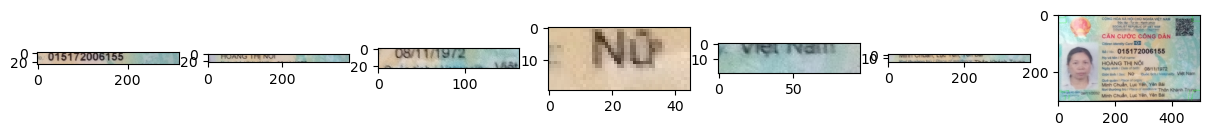

In [3]:
# Load image
img = cv2.imread("C:/Users/caotu/Downloads/Python/DOB_crop/47.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define the ROIs
rois = [                        # rois = img[y:y+h, x:x+w]
    img[121:146, 185:585],      # Số                    x, y, w, h = 185, 121, 400, 25             
    img[165:188, 120:520],      # Name                  x, y, w, h = 120, 165, 400, 26
    img[187:209, 285:448],      # DOB                   x, y, w, h = 285, 187, 163, 22
    img[203:223, 233:278],      # Sex                   x, y, w, h = 233, 203, 45, 20
    img[207:227, 405:805],      # Nation                x, y, w, h = 405, 207, 400, 20
    img[246:265, 125:525],      # Origin                x, y, w, h = 125, 246, 400, 19
    img[275:295, 58:138],       # Expiry                x, y, w, h = 58, 275, 80, 20
]

# ROIs of Residence
roi1 = img[265:285, 338:738]    # Residence (top)       x1, y1, w1, h1 = 338, 265, 400, 20
roi2 = img[280:305, 130:430]    # Residence (bottom)    x2, y2, w2, h2 = 130, 280, 400, 25

# Convert NumPy array to PIL Image object for each ROI
pil_rois = [Image.fromarray(roi) for roi in rois]
pil_roi1 = Image.fromarray(roi1)
pil_roi2 = Image.fromarray(roi2)

# Display the ROIs
fig, axs = plt.subplots(1, len(rois), figsize=(15, 5))
for i, roi in enumerate(pil_rois):
    axs[i].imshow(roi)

# Detect words in each ROI
for i, roi in enumerate(pil_rois):
    s = detector.predict(roi)
    print(f'{["Số", "Name", "DOB", "Sex", "Nation", "Origin", "Expiry"][i]}: {s}')

s1 = detector.predict(pil_roi1)
s2 = detector.predict(pil_roi2)
result = s1 + ' ' + s2
print(f'{"Residence"}:',result)

# Display the output image with the detected ROIs
plt.imshow(img)
plt.show()

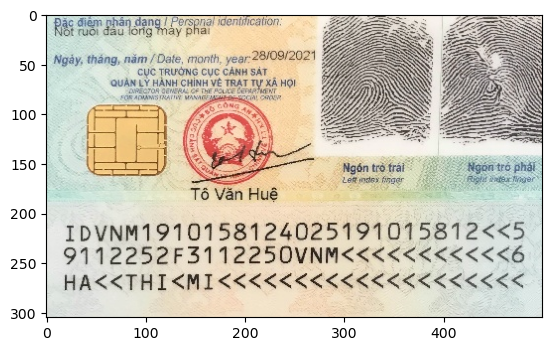

In [5]:
plt.imshow(img)

28/06/2021


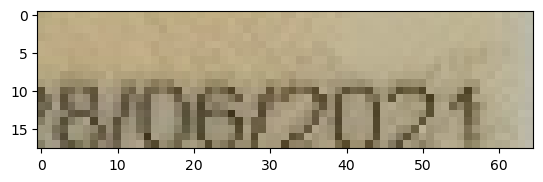

In [22]:
# Load image
img = cv2.imread("C:/Users/caotu/Downloads/Python/CMND_CCCD_crop/27.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define the ROIs
x, y, w, h = 208, 32, 65, 18            #205, 30, 73, 18
roi = img[y:y+h, x:x+w]

# Convert NumPy array to PIL Image object for each ROI
pil_roi = Image.fromarray(roi)
plt.imshow(pil_roi)

s = detector.predict(pil_roi)
print(s)

# Display the output image with the detected ROIs
#plt.imshow(img)
#plt.show()